In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
my_arr = np.random.normal(loc=20, scale=3.5, size=100)
my_arr

array([20.56337352, 23.42899906, 21.87069963, 22.90311978, 13.11652777,
       28.30002281, 21.59624264, 15.16397156, 23.47072213, 18.86770203,
       17.97893938, 22.32759174, 21.15605575, 16.59293035, 23.87425187,
       18.67758563, 16.99380487, 25.90253901, 15.90108409, 19.51084018,
       14.49976646, 20.14794407, 24.90129448, 15.87437066, 19.7350531 ,
       15.17036556, 17.12134312, 19.18637247, 24.93014873, 16.87816061,
       19.81336631, 19.681501  , 22.21370196, 20.70086521, 18.37720082,
       16.52439978, 20.7039215 , 19.84059378, 15.75649245, 19.74886886,
       22.3313862 , 20.04643629, 19.09600782, 23.9606165 , 17.05635798,
       18.11068209, 25.12463927, 20.87152939, 21.72953739, 18.60158029,
       22.14616181, 13.76591106, 23.76966605, 24.28371541, 17.8915472 ,
       21.30909986, 16.51070311, 12.0686877 , 22.72109821, 22.20102651,
       23.71452334, 19.68565742, 31.08215235, 19.26802643, 14.00381509,
       18.40355351, 15.15318818, 17.03754598, 19.27971649, 21.19

In [ ]:
my_df = pd.DataFrame(my_arr, columns=['var_1'])
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var_1   100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


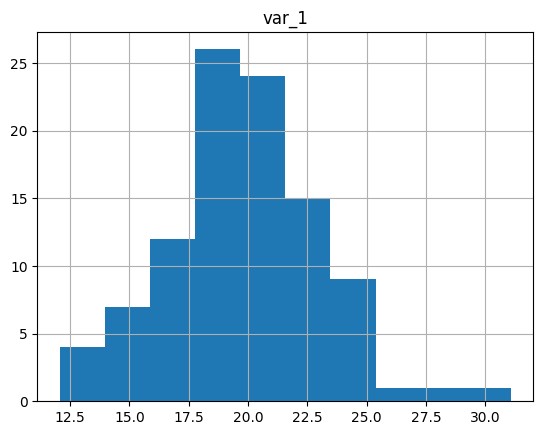

In [ ]:
my_df.hist()
plt.show()

In [ ]:
my_df['var_2'] = my_df['var_1'].apply(lambda x: (x*3 + 5))
my_df

,var_1,var_2
0,20.563374,66.690121
1,23.428999,75.286997
2,21.870700,70.612099
3,22.903120,73.709359
4,13.116528,44.349583
...,...,...
95,18.923079,61.769238
96,16.778136,55.334409
97,18.016906,59.050718
98,21.984413,70.953238


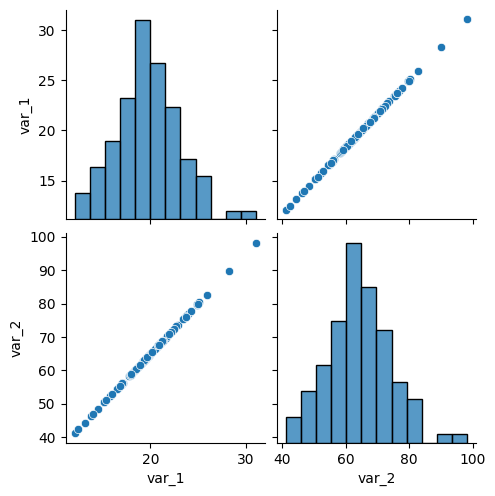

In [ ]:
sns.pairplot(data=my_df)
plt.show()

In [ ]:
my_df.corr()

,var_1,var_2
var_1,1.0,1.0
var_2,1.0,1.0


In [ ]:
noise = np.random.normal(loc=0, scale=3, size=100)
my_df['var_3'] = my_df['var_2'] + noise
my_df

,var_1,var_2,var_3
0,20.563374,66.690121,68.892865
1,23.428999,75.286997,79.486189
2,21.870700,70.612099,67.540292
3,22.903120,73.709359,76.962220
4,13.116528,44.349583,44.949451
...,...,...,...
95,18.923079,61.769238,63.530113
96,16.778136,55.334409,56.407256
97,18.016906,59.050718,60.034327
98,21.984413,70.953238,69.273341


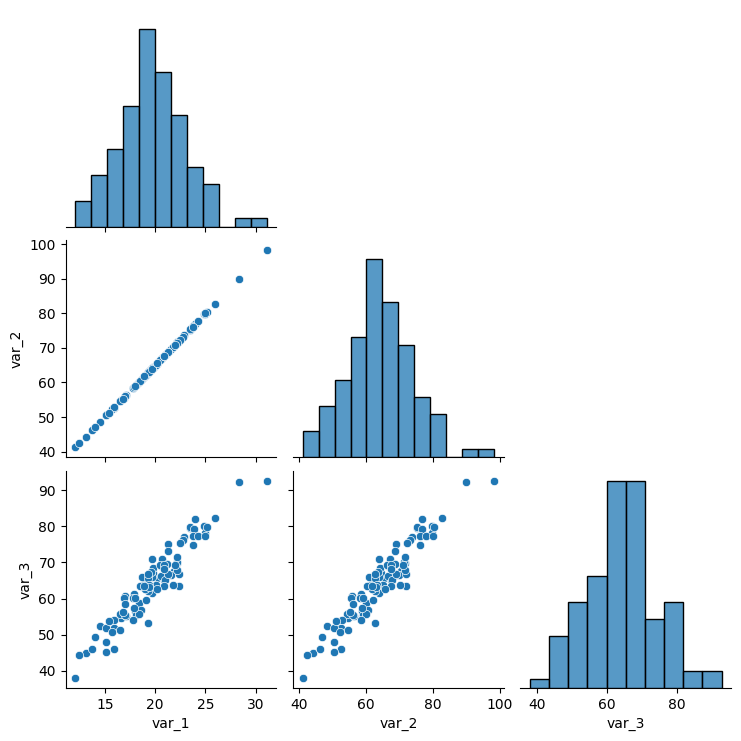

In [ ]:
sns.pairplot(data=my_df, corner=True)
plt.show()

In [ ]:
my_df.corr()

,var_1,var_2,var_3
var_1,1.000000,1.000000,0.949097
var_2,1.000000,1.000000,0.949097
var_3,0.949097,0.949097,1.000000


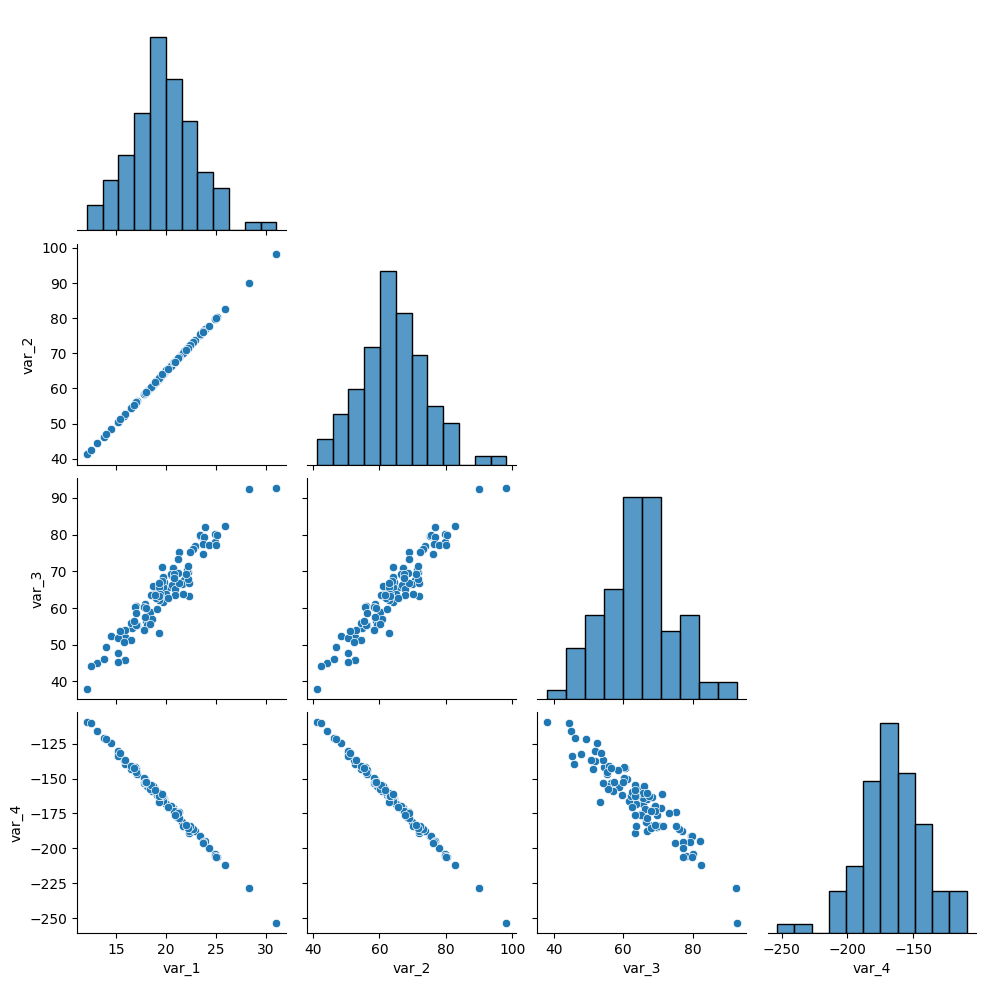

In [ ]:
my_df['var_4'] = (3*my_df['var_1']) - (4*my_df['var_2']) + (0.5*my_df['var_3'])
sns.pairplot(data=my_df, corner=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
url_train = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_train.csv"
url_test = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_salary_test.csv"

In [ ]:
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  24 non-null     float64
 1   Salary           24 non-null     float64
dtypes: float64(2)
memory usage: 516.0 bytes


In [ ]:
#step 2 preprocessing

df_train.columns = df_train.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
yearsexperience,24.0,5.2125,2.776816,1.1,3.2,4.5,7.30,10.5
salary,24.0,74714.8750,26365.625646,39343.0,56430.0,65237.0,99030.25,121872.0


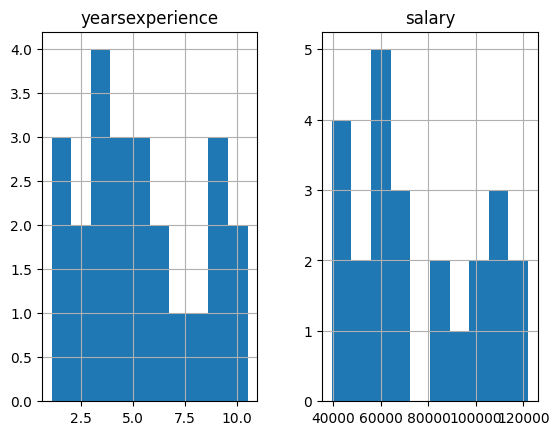

In [ ]:
df_train.hist()
plt.show()

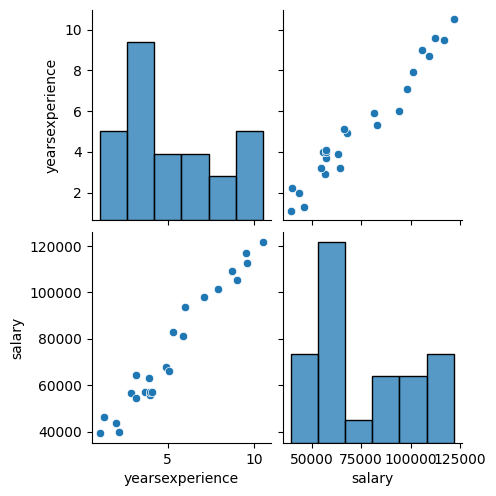

In [ ]:
sns.pairplot(data=df_train)
plt.show()

In [ ]:
df_train.corr()

,yearsexperience,salary
yearsexperience,1.000000,0.977132
salary,0.977132,1.000000


In [ ]:
#Step 4 Machine Learning

X_train = df_train[['yearsexperience']] #Tiene que ser un DataFrame [[]]
y_train = df_train['salary'] #Tiene que ser un vector []

X_test = df_test[['yearsexperience']] #Tiene que ser un DataFrame [[]]
y_test = df_test['salary'] #Tiene que ser un vector []

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_hat = linear_model.predict(X_test)
print(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
print(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
print(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')

#La prediccion seria (y_hat +- RMSE) o (y_hat +- MAE)

MSE(Mean squeare error): 37649779.451336615
MAE(Mean absolute error): 4940.929321407512
RMSE(Root mean squeare error): 6135.941610815459


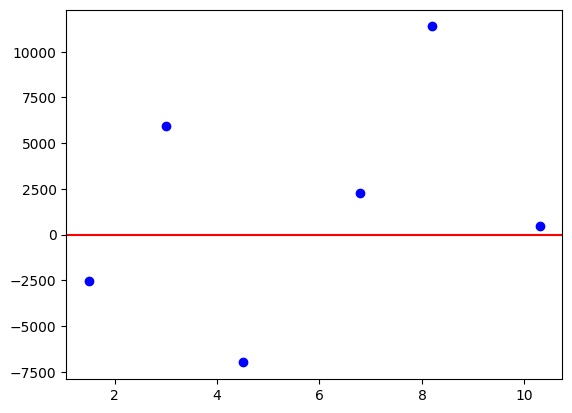

In [ ]:
#Residuales, diferencia entre la prediccion y el valor real

residual = y_test - y_hat
plt.scatter(X_test, residual, color='b')
plt.axhline(y=0, color='r')
plt.show()

In [ ]:
linear_model.intercept_

np.float64(26354.43069701219)

In [ ]:
linear_model.coef_

array([9277.78307971])

In [ ]:
# y_hat = 26354.4 + 9277.8 * years_experience

def predictions(coef, intercept, x):
  return intercept + coef * x

prds = predictions(9277.8, 26354.4, X_train)
prds

,yearsexperience
0,36559.98
1,38415.54
2,44910.00
3,46765.56
4,53260.02
5,56043.36
6,56043.36
7,60682.26
8,62537.82
9,63465.60


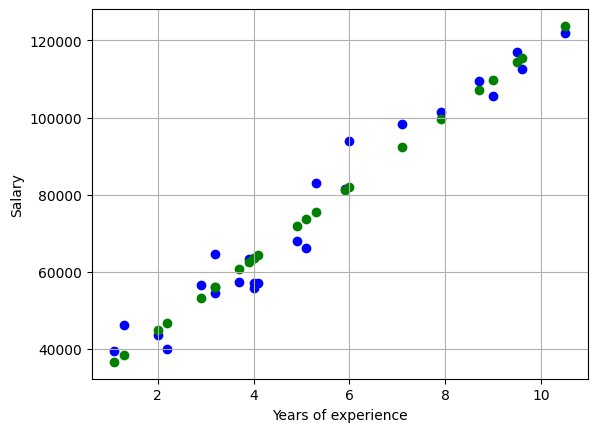

In [ ]:
plt.scatter(x=X_train, y=y_train, color='b')
plt.scatter(x=X_train, y=prds, color='g')
plt.grid(True)
plt.xlabel('Years of experience')
plt.ylabel('Salary')
plt.show()
#Para poder predecir necesitamos estas condiciones:

# Existe una relación lineal entre los predictores y el objetívo ? Sí
# Existe independencia entre los predictores ? Sí
# La varianza es constante ? Sí
# Los errores son normalmente distribuidos ? Sí

----------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder #Transforma las variables categórica a numéricas
from sklearn.linear_model import Lasso, Ridge

In [ ]:
#Step 1. Load Data

df_raw = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df_raw.sample(10, random_state=2025)
# X = [age, sex, bmi, childre, smoker, ''region'']
# y = charges

,age,sex,bmi,children,smoker,region,charges
1269,45,male,27.500,3,no,southwest,8615.30000
942,18,female,40.185,0,no,northeast,2217.46915
1240,52,male,41.800,2,yes,southeast,47269.85400
1229,58,male,30.305,0,no,northeast,11938.25595
272,41,male,37.050,2,no,northwest,7265.70250
738,23,male,31.730,3,yes,northeast,36189.10170
1105,54,female,31.240,0,no,southeast,10338.93160
1182,25,female,30.300,0,no,southwest,2632.99200
14,27,male,42.130,0,yes,southeast,39611.75770
596,42,female,29.480,2,no,southeast,7640.30920


In [ ]:
#Step 2 Preprocessing

df_baking = df_raw.copy()
df_baking['sex'] = df_baking['sex'].astype('category')
df_baking['region'] = df_baking['region'].astype('category')
df_baking['smoker'] = df_baking['smoker'].astype('category')
df_baking['dummy'] = np.random.normal(loc=10, scale=1, size=1338)
df_baking['charges'] = np.log(df_baking['charges'])
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
 7   dummy     1338 non-null   float64 
dtypes: category(3), float64(3), int64(2)
memory usage: 56.8 KB


$D: 1338*7$ Data set inicial  
$D_{train}: 1204*7$ Data set de aprendizaje  
$D_{test}: 134*7$ Data set prueba  
$X_{train}: 1204*6$ Matriz de aprendizaje (predictores)  
$y_{train}: 1204*1$ Vector de resultantes (objetivo)  
$X_{test}: 134*6$ Matriz de prueba (predictores)  
$y_{test}: 134*1$ Vector de prueba (objetivo)

Predictors_numeric : Age, bmi, children  
Predictor_binary : sex, smoker  
Predictors_category: region  
Total_predictors_pipeline: 8 (3 numeric + 2 binary + (4-1) category_1)

In [ ]:
#Step 3 EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((1204, 8), (134, 8))

In [ ]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,1204.0,39.181063,14.151788,18.000000,26.000000,39.000000,51.000000,64.000000
bmi,1204.0,30.643800,6.086388,15.960000,26.220000,30.400000,34.717500,53.130000
children,1204.0,1.093854,1.199333,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1204.0,9.103639,0.920947,7.022756,8.464704,9.151006,9.736511,11.063045
dummy,1204.0,10.049142,0.997670,7.113955,9.381571,10.055647,10.747148,12.867154


,count,unique,top,freq
sex,1204,2,male,604
smoker,1204,2,no,956
region,1204,4,southeast,320


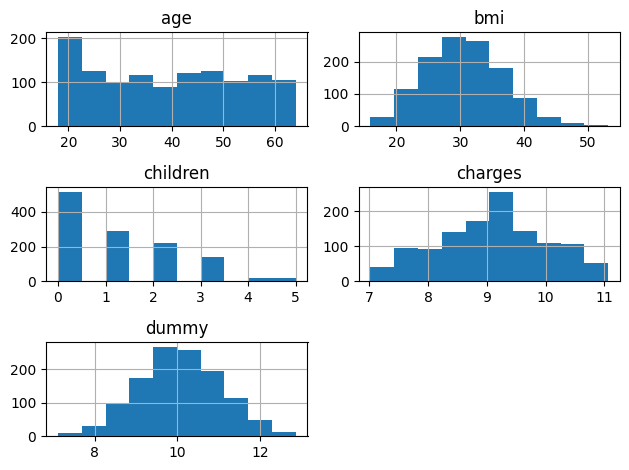

In [ ]:
df_train.hist()
plt.tight_layout()
plt.show()

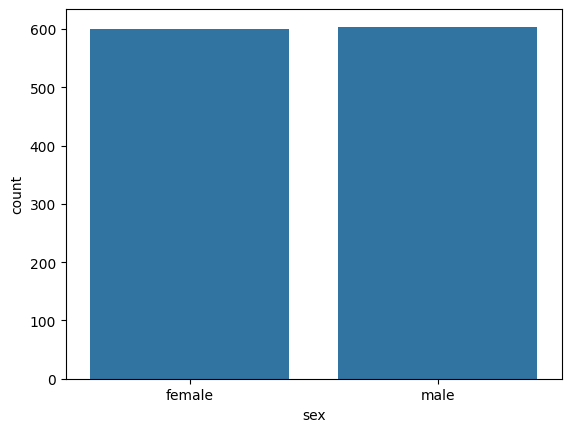

In [ ]:
sns.countplot(df_train, x='sex')
plt.show()

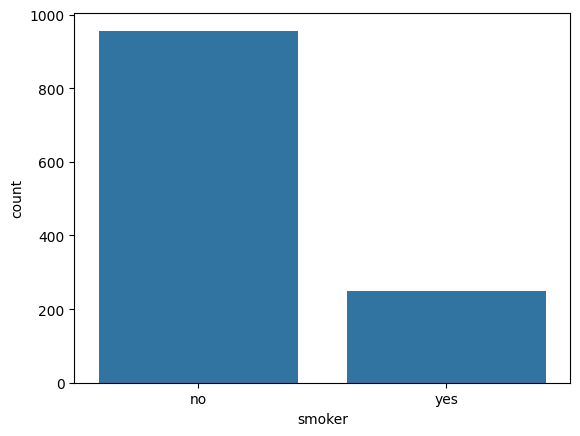

In [ ]:
sns.countplot(df_train, x='smoker')
plt.show()

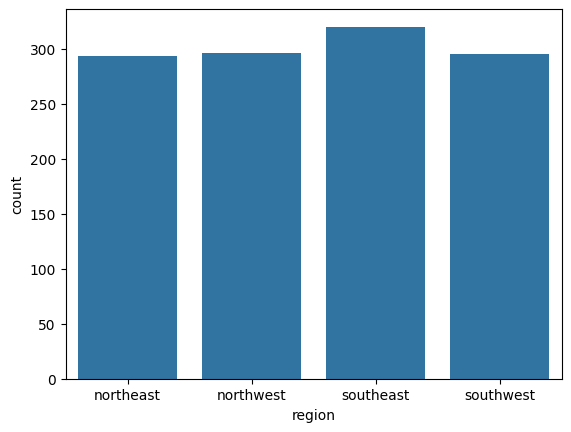

In [ ]:
sns.countplot(df_train, x='region')
plt.show()

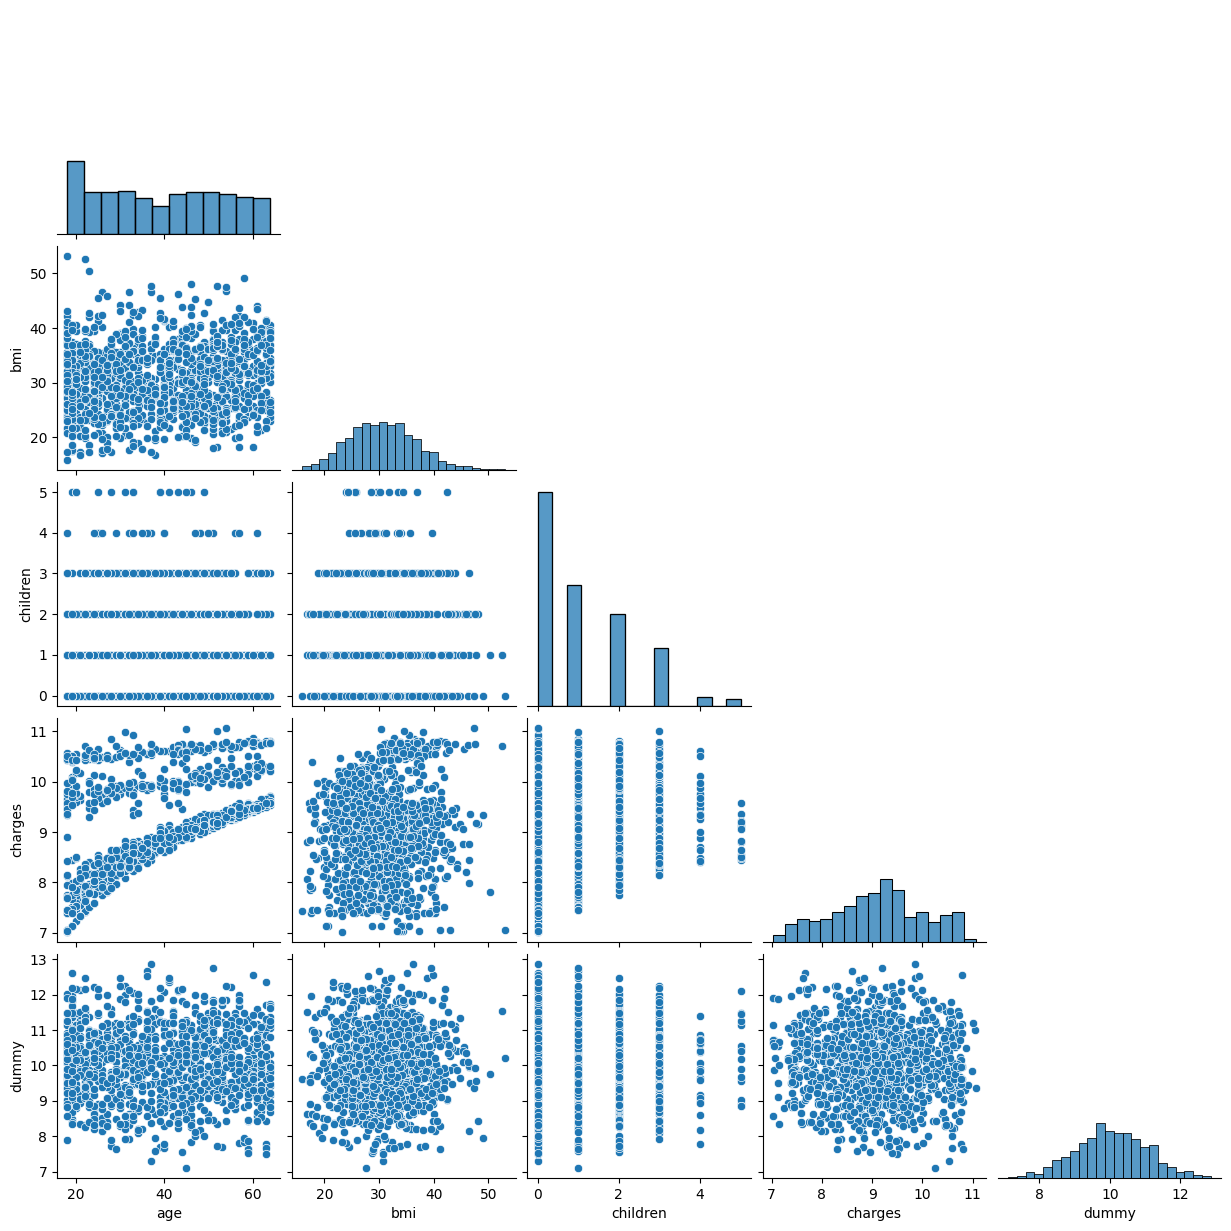

In [ ]:
sns.pairplot(data=df_train, corner=True)
plt.show()

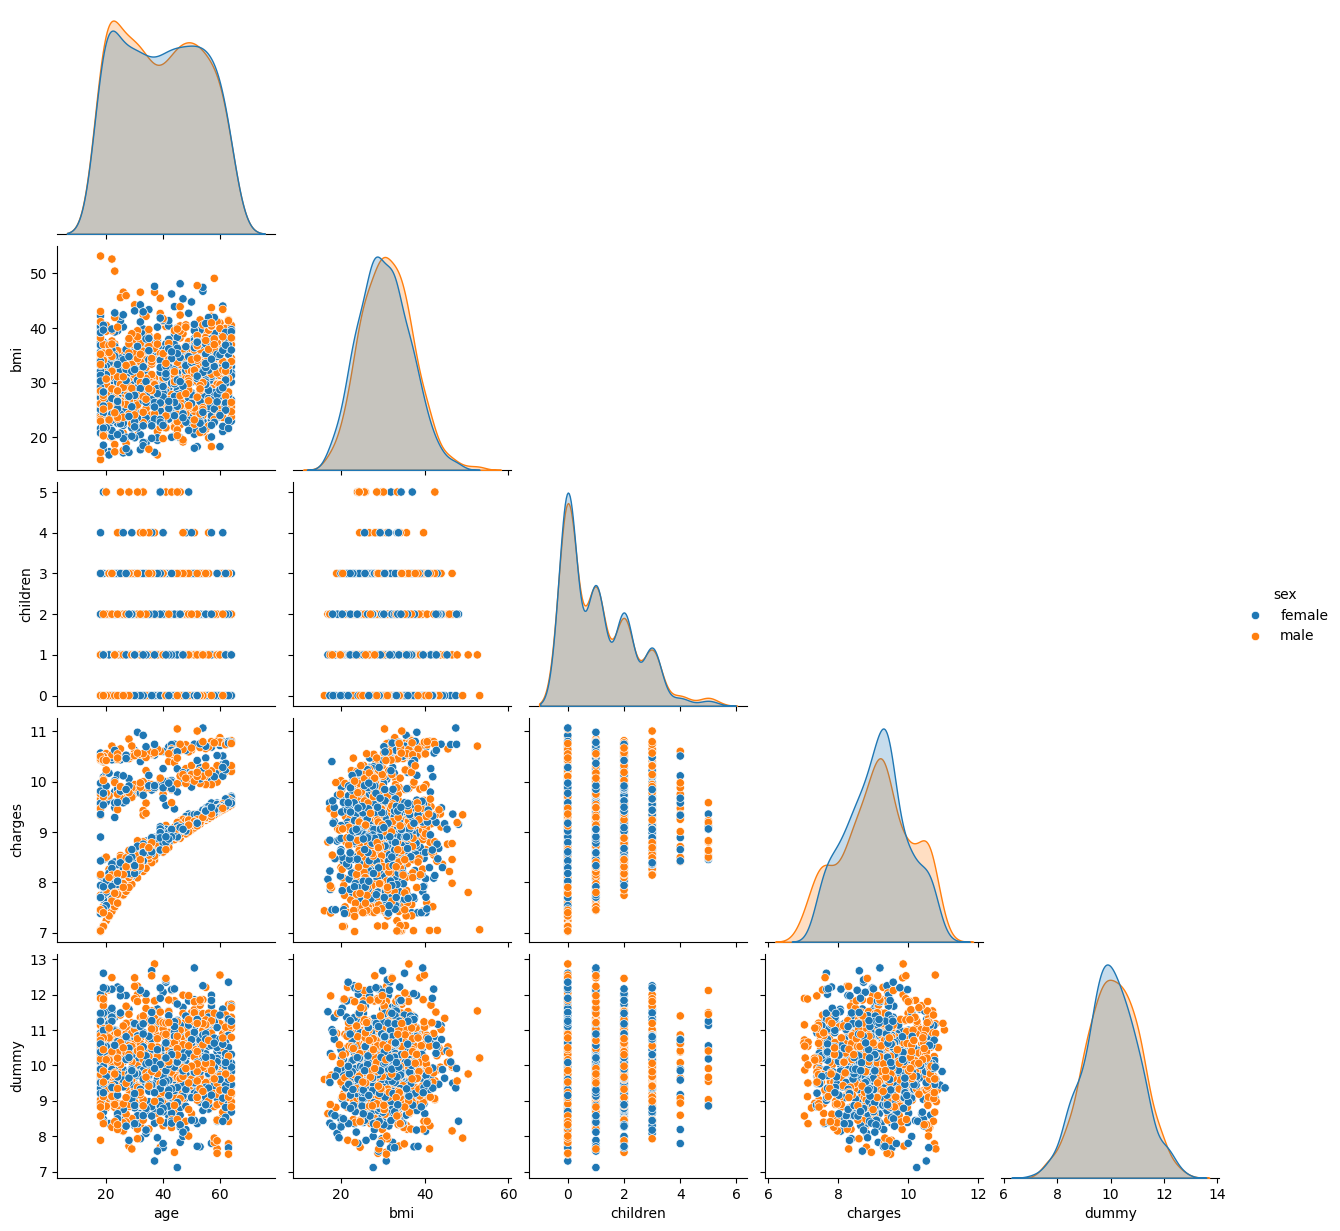

In [ ]:
sns.pairplot(df_train, hue='sex', corner=True)
plt.show()

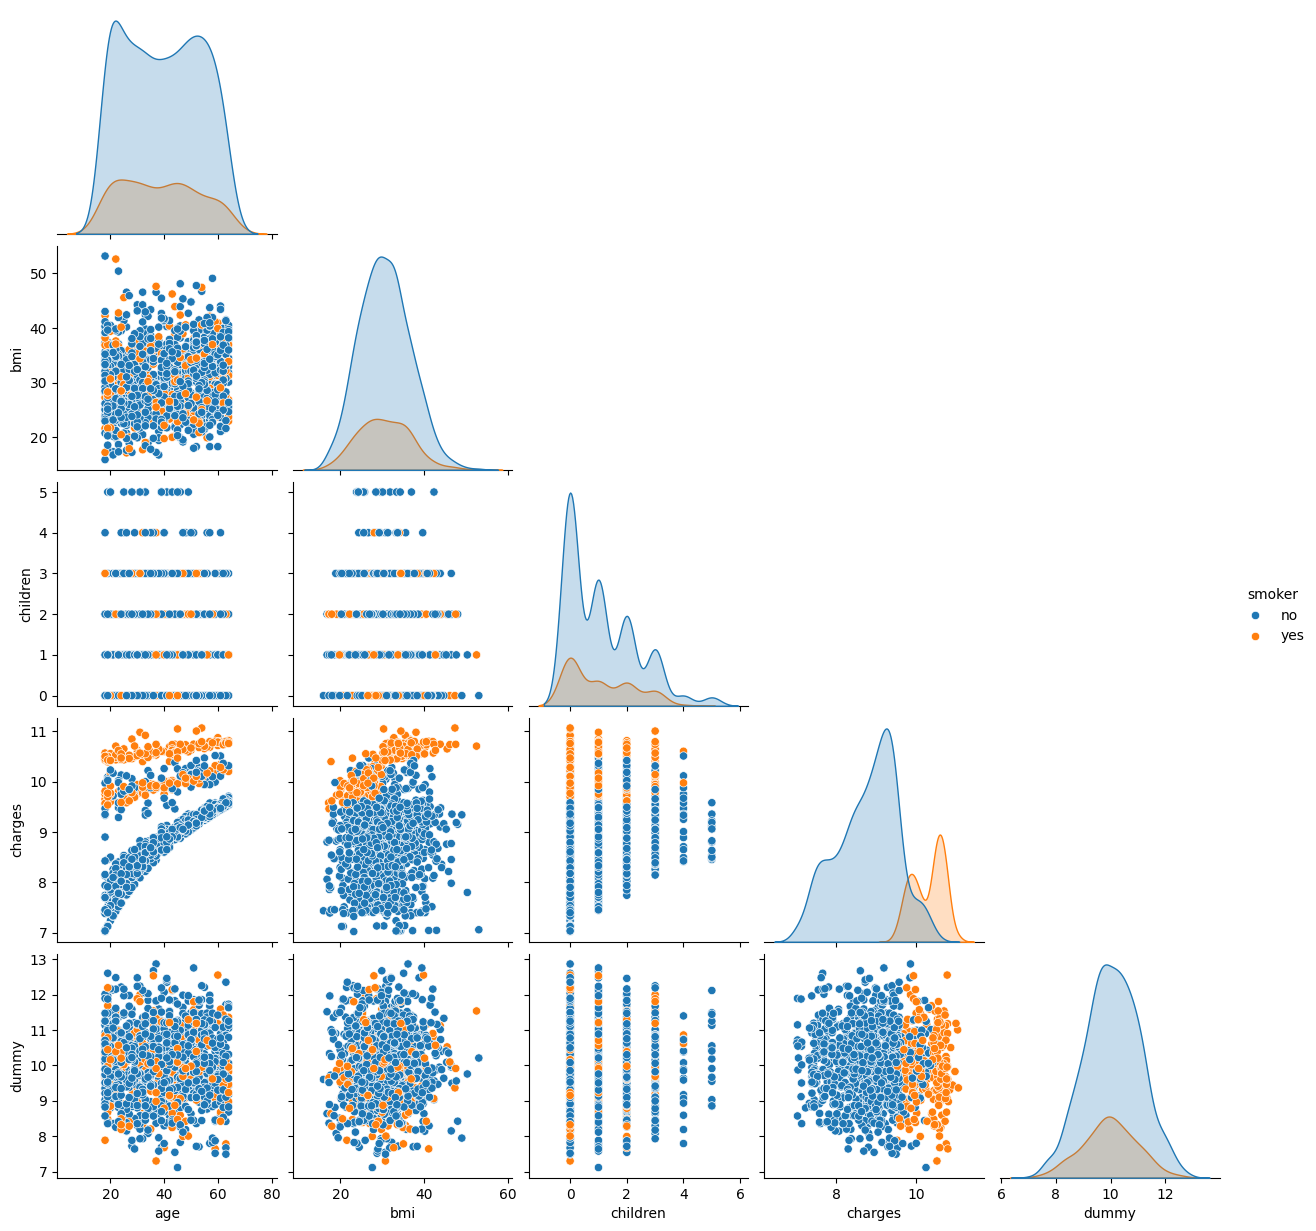

In [ ]:
sns.pairplot(df_train, hue='smoker', corner=True)
plt.show()

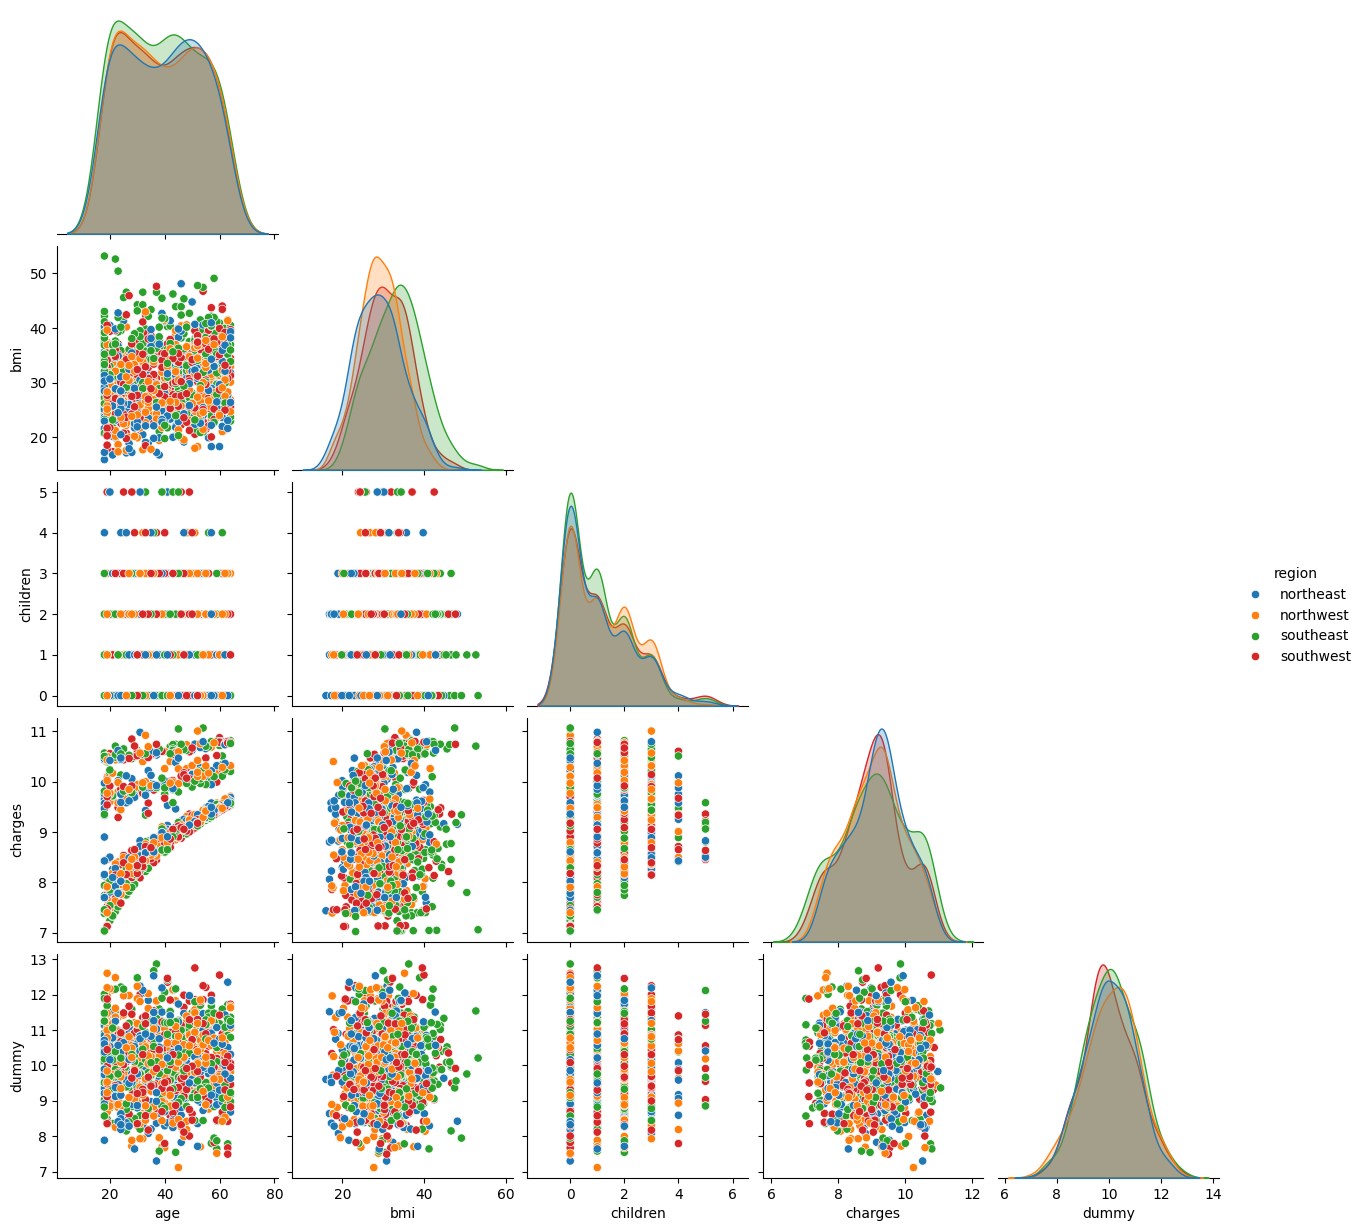

In [ ]:
sns.pairplot(df_train, hue='region', corner=True)
plt.show()

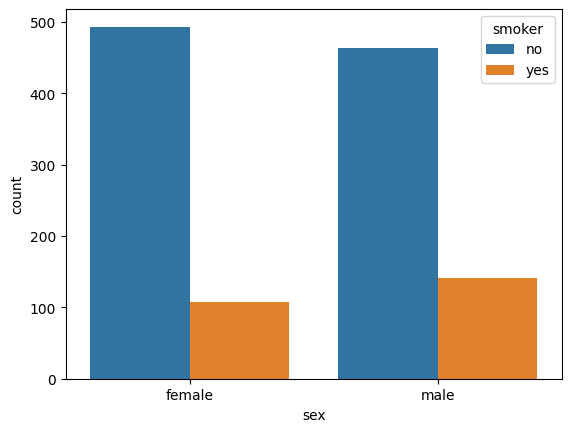

In [ ]:
sns.countplot(df_train, x='sex', hue='smoker')
plt.show()

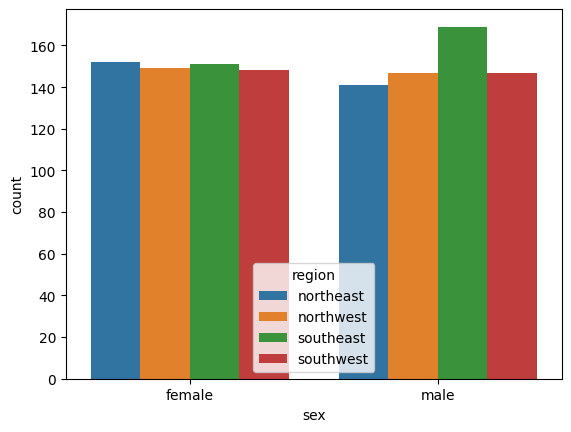

In [ ]:
sns.countplot(df_train, x='sex', hue='region')
plt.show()

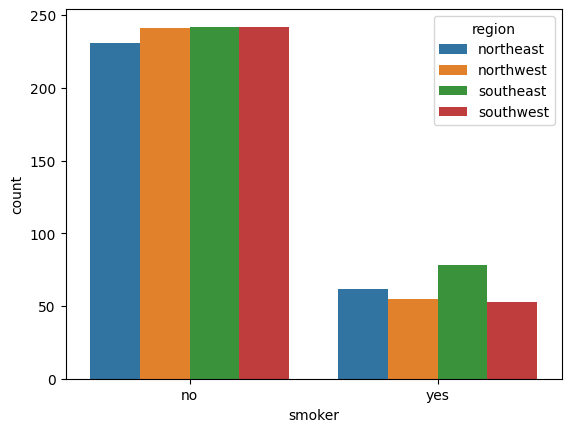

In [ ]:
sns.countplot(df_train, x='smoker', hue='region')
plt.show()

In [ ]:
#Step 4. ML
X_train = df_train.drop(columns='charges')
y_train = df_train['charges']

X_test = df_test.drop(columns='charges')
y_test = df_test['charges']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1204, 7), (1204,), (134, 7), (134,))

In [ ]:
num_cols = X_train.select_dtypes('number').columns
cat_cols = X_train.select_dtypes('category').columns #Rango 0 y 1

num_proc = Pipeline(steps=[
    ('scaler',MinMaxScaler()) #MinMaxScaler escala los valores de una columna entre 0 y 1
])
#Para valores razonablemente simétricos se puede aplicar el StandarScaler escalando los valores a un promedio cero(0) y desviación estandar uno(1)
cat_proc = Pipeline(steps=[
    ('oneoht',OneHotEncoder(drop='first'))
])
processor = ColumnTransformer(transformers=[
    ('num',num_proc,num_cols),
    ('cat',cat_proc,cat_cols)
])
linear_r = Pipeline(steps=[
    ('proce',processor),
    ('lreg',LinearRegression())
])

In [ ]:
reg_lr.fit(X_train, y_train)
y_hat = reg_lr.predict(X_test)

print(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
print(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
print(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')
print(f'R2(R SQUARE): {r2_score(y_test, y_hat)}') #Porcentaje de variabilidad explicada


MSE(Mean squeare error): 0.15168377687196827
MAE(Mean absolute error): 0.24388144889680802
RMSE(Root mean squeare error): 0.38946601504106654
R2(R SQUARE): 0.8149831100450957


In [ ]:
reg_lr['lreg'].intercept_

np.float64(7.8281511716598855)

In [ ]:
reg_lr['lreg'].coef_ #coef B_n, mientras mas grande el coeficiente es mas importante solo en LR

array([ 1.57990055,  0.48733106,  0.52262476,  0.08221124, -0.08083877,
        1.5560716 , -0.0493892 , -0.15525927, -0.11160095])

In [ ]:
reg_lr['proce'].get_feature_names_out()

array(['num__age', 'num__bmi', 'num__children', 'num__dummy',
       'cat__sex_male', 'cat__smoker_yes', 'cat__region_northwest',
       'cat__region_southeast', 'cat__region_southwest'], dtype=object)

$$y=β_0+β_1*age+β_2*bmi+β_3*children+β_4*malesex+β_5*smokeryes+β_6*regionnw+β_7*regionse+β_8*regionsw$$

$$y=-2141.8+12017.6*age+12671.9*bmi+2771.3*children-198.4*malesex+23859.7*smokeryes-148.4*regionnw-993.7*regionse-705.4*regionsw$$

In [ ]:
#Step 5. Predictor model

df_train.head(2)

,age,sex,bmi,children,smoker,region,charges,dummy
0,22,male,35.60,0,yes,southwest,10.479696,8.303597
1,19,male,35.53,0,no,northwest,7.406364,10.040826


In [ ]:
my_value = pd.DataFrame({
    'age':[19],
    'sex':['male'],
    'bmi':[35.53],
    'children':[0],
    'smoker':['no'],
    'region':['northwest'],
    'dummy':[10]
})
reg_lr.predict(my_value)

array([8.03008919])

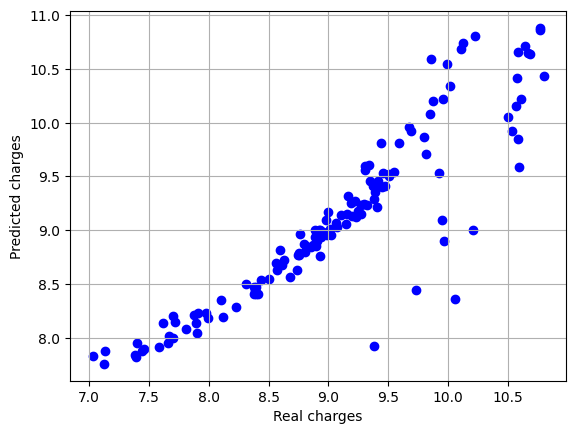

In [ ]:
plt.scatter(x=y_test, y=y_hat, color='b')
plt.grid(True)
plt.xlabel('Real charges')
plt.ylabel('Predicted charges')
plt.show()

In [ ]:
reg_lasso = Pipeline(steps=[
    ('proce',processor),
    ('reg_lasso',Lasso(alpha=100)) #Nos permite saber cuales valores estan de mas y que predictores son claves
])
reg_lasso.fit(X_train, y_train)
y_hat = reg_lasso.predict(X_test)

print(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
print(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
print(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')

MSE(Mean squeare error): 0.8223103062398401
MAE(Mean absolute error): 0.7171625517497415
RMSE(Root mean squeare error): 0.906813269774897


In [ ]:
reg_lasso['reg_lasso'].coef_ #coef B_n, mientras mas grande el coeficiente es mas importante solo en LR

array([ 0.,  0.,  0., -0.,  0.,  0., -0., -0., -0.])

In [ ]:
reg_lasso['proce'].get_feature_names_out()

array(['num__age', 'num__bmi', 'num__children', 'num__dummy',
       'cat__sex_male', 'cat__smoker_yes', 'cat__region_northwest',
       'cat__region_southeast', 'cat__region_southwest'], dtype=object)

In [ ]:
reg_ridge = Pipeline(steps=[
    ('proce',processor),
    ('reg_ridge',Ridge(alpha=100))
])
reg_ridge.fit(X_train, y_train)
y_hat = reg_ridge.predict(X_test)

print(f'MSE(Mean squeare error): {mean_squared_error(y_test, y_hat)}') #Prueba, prediccion
print(f'MAE(Mean absolute error): {mean_absolute_error(y_test, y_hat)}')
print(f'RMSE(Root mean squeare error): {np.sqrt(mean_squared_error(y_test, y_hat))}')

MSE(Mean squeare error): 0.2772702999745498
MAE(Mean absolute error): 0.37790883651682383
RMSE(Root mean squeare error): 0.5265646208914437


In [ ]:
reg_ridge['reg_ridge'].coef_ #coef B_n, mientras mas grande el coeficiente es mas importante solo en LR

array([ 0.84807595,  0.12972167,  0.22289953, -0.00979463, -0.03553962,
        1.01565506, -0.01050754, -0.05098865, -0.04857017])

In [ ]:
reg_lasso['proce'].get_feature_names_out()

array(['num__age', 'num__bmi', 'num__children', 'num__dummy',
       'cat__sex_male', 'cat__smoker_yes', 'cat__region_northwest',
       'cat__region_southeast', 'cat__region_southwest'], dtype=object)